In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import plotly.graph_objects as go
import plotly.express as px
import opendatasets as od
import os
import dash
from dash import dcc
from dash import html
import time

### Création des dataframes pour chaque fichier csv avec pandas

In [2]:
#import des fichier s'ils n'existe pas et verification de son téléchargement
if os.path.exists('formula-1-world-championship-1950-2020'):
    print('le repertoir existe deja')
    #condition pour voir si le dossier à moins de 3 semaines
    if (time.time() - os.path.getmtime('formula-1-world-championship-1950-2020') > (60*60*24*21)): 
        print('Les données ont été téléchagé il y a plus de 3 semaines il existe peut être une version plus réssante.')
        print("Si vous voulez renouveller les dataset vous n'avez cas supprimer le dossier 'formula-1-world-championship-1950-2020' et\nrelancer le script")
    else:
        print('Il a moins de 3 semaine')
else:
    print("le repertoir n'existe pas")
    od.download("https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020")
    print('le repertoir exist a present')

le repertoir existe deja
Il a moins de 3 semaine


In [3]:
#création de dataframe pour chaque fichier 'csv'
df_circuits = pd.read_csv('formula-1-world-championship-1950-2020/circuits.csv')
df_constructor_results = pd.read_csv('formula-1-world-championship-1950-2020/constructor_results.csv')
df_constructor_standings = pd.read_csv('formula-1-world-championship-1950-2020/constructor_standings.csv')
df_constructors = pd.read_csv('formula-1-world-championship-1950-2020/constructors.csv')
df_driver_standings = pd.read_csv('formula-1-world-championship-1950-2020/driver_standings.csv')
df_drivers = pd.read_csv('formula-1-world-championship-1950-2020/drivers.csv')
df_lap_times = pd.read_csv('formula-1-world-championship-1950-2020/lap_times.csv')
df_pit_stops = pd.read_csv('formula-1-world-championship-1950-2020/pit_stops.csv')
df_qualifying = pd.read_csv('formula-1-world-championship-1950-2020/qualifying.csv')
df_races = pd.read_csv('formula-1-world-championship-1950-2020/races.csv')
df_results = pd.read_csv('formula-1-world-championship-1950-2020/results.csv')
df_seasons = pd.read_csv('formula-1-world-championship-1950-2020/seasons.csv')
df_status = pd.read_csv('formula-1-world-championship-1950-2020/status.csv')

### Création d'une liste possedant tous les dataframes

In [4]:
list_df = [df_circuits,
          df_constructor_results,
          df_constructor_standings,
          df_constructors,
          df_driver_standings,
          df_drivers,
          df_lap_times,
          df_pit_stops,
          df_qualifying,
          df_races,
          df_results,
          df_seasons,
          df_status]

## Affichage des informations de chaque dataframes 

In [5]:
#for i in list_df : i.info()

## Description des dataframes un à un

In [6]:
#dataframe sur les différents circuits
df_circuits.drop(columns=["url"],inplace=True)
df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130


In [7]:
#rename columns for easiest understanding
df_circuits.rename(columns = {'circuitRef':'Ref_circuit',
                             'location':'city',
                             'lat':'latitude',
                             'lng':'longitude',
                             'alt':'altitude'},
                    inplace = True)
# afficher les nouvelles entêtes
df_circuits.head()

,circuitId,Ref_circuit,name,city,country,latitude,longitude,altitude
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130


In [8]:
#un peu de data viz 
#tout d'abord trier les circuits du moins élevé au plus élevé
df_circuits = df_circuits.sort_values(by=['altitude'])
df_circuits = df_circuits.reset_index()
df_circuits.drop(columns=["index"],inplace=True)
#df_circuits.drop(columns=["level_0"],inplace=True)
df_circuits.head()

,circuitId,Ref_circuit,name,city,country,latitude,longitude,altitude
0,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.3725,49.8533,-7
1,35,yeongam,Korean International Circuit,Yeongam County,Korea,34.7333,126.4170,0
2,71,sochi,Sochi Autodrom,Sochi,Russia,43.4057,39.9578,2
3,24,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3
4,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.7769,-74.0111,4


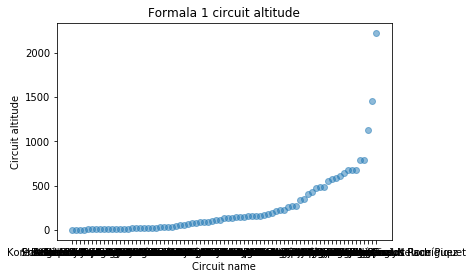

In [9]:
######graphe a modifier avec plus de detailles (rajouter une colonne continent, mettre diffrente couleur en fonction du continent, agradir le tableau pour avoir une absicse lisible)##### 
#graphe de description
plt.scatter(df_circuits['name'],df_circuits['altitude'], alpha=0.5)  # alpha chances the transparency
#titre et legendes
plt.title('Formala 1 circuit altitude')
plt.xlabel('Circuit name')
plt.ylabel('Circuit altitude')
#affichage du graph
plt.show()

A première vu le graph ci-dessus n'est pas très représentatif et compréhensible.
Pour rendre ce graph plus attractif,  nous allons créer une colonne qui donne le continent dans lequel se trouve le circuit.

In [10]:
#nous allons d'abord recuperer uniquement la colonne qui donne le pays
pays = df_circuits['country']
print("Il y a ligne", len(pays), "à la base")
#dans un second temps nous allons retirer les doublons 
#pays = set(pays)
pays = pays.drop_duplicates().reset_index()#gerons les duplications de pays comme dans un dataframe
pays = pays['country']
print("A present on voit qu'il y a", len(pays), "pays different dans en F1")

Il y a ligne 77 à la base
A present on voit qu'il y a 34 pays different dans en F1


A présent nous allons créer une liste qui regroupe tous le continent

In [11]:
continents = ['North_America', 'South_America', 'Africa', 'Asia', 'Oceania', 'Europe']

Nous allons maintenant créer un dictionnaire des continents avec les pays qui s'y trouvent

In [12]:
#dans cd dictionnaire la clé sera le pays et la value le continent pour des soucis pratiques
continents_dic = {
    'Azerbaijan' : 'Asia',
    'Korea' : 'Asia',
    'Russia' : 'Asia',
    'UAE' : 'Asia',
    'USA' : 'North_America',
    'Spain' : 'Europe',
    'China' : 'Asia',
    'Netherlands' : 'Europe',
    'Bahrain' : 'Asia',
    'Monaco' : 'Europe',
    'Argentina' : 'South_America',
    'Vietnam' : 'Asia',
    'Australia' : 'Oceania',
    'Canada' : 'North_America',
    'Saudi Arabia' : 'Asia',
    'South Africa' : 'Africa',
    'Singapore' : 'Asia',
    'Malaysia' : 'Asia',
    'Morocco' : 'Africa',
    'UK' : 'Europe',
    'Portugal' : 'Europe',
    'Belgium' : 'Europe',
    'Italy' : 'Europe',
    'Japan' : 'Asia',
    'Germany' : 'Europe',
    'France' : 'Europe',
    'Turkey' : 'Asia',
    'Sweden' : 'Europe',
    'India' : 'Asia',
    'Hungary' : 'Europe',
    'Switzerland' : 'Europe',
    'Austria' : 'Europe',
    'Brazil' : 'South_America',
    'Mexico' : 'North_America'
}
#representation des clee et value de 'continents_dic' 
print("Les clee de 'continents_dic' sont :\n",continents_dic.keys())
print('')
print("Les values de 'continents_dic' sont :\n",continents_dic.values())

Les clee de 'continents_dic' sont :
 dict_keys(['Azerbaijan', 'Korea', 'Russia', 'UAE', 'USA', 'Spain', 'China', 'Netherlands', 'Bahrain', 'Monaco', 'Argentina', 'Vietnam', 'Australia', 'Canada', 'Saudi Arabia', 'South Africa', 'Singapore', 'Malaysia', 'Morocco', 'UK', 'Portugal', 'Belgium', 'Italy', 'Japan', 'Germany', 'France', 'Turkey', 'Sweden', 'India', 'Hungary', 'Switzerland', 'Austria', 'Brazil', 'Mexico'])

Les values de 'continents_dic' sont :
 dict_values(['Asia', 'Asia', 'Asia', 'Asia', 'North_America', 'Europe', 'Asia', 'Europe', 'Asia', 'Europe', 'South_America', 'Asia', 'Oceania', 'North_America', 'Asia', 'Africa', 'Asia', 'Asia', 'Africa', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Asia', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'South_America', 'North_America'])


In [13]:
#creation d'un dictionnaire qui attribue une couleur a un continent
couleur_dic = {
    'Asia' : '#F26230',
    'North_America' : '#223D96',
    'South_America' : '#653195',
    'Africa' : '#FEC810',
    'Oceania' : '#29AC46',
    'Europe' : '#eb242b'
}
#representation des clee et value de 'continents_dic' 
print("Les clee de 'couleur_dic' sont :\n",couleur_dic.keys())
print('')
print("Les values de 'couleur_dic' sont :\n",couleur_dic.values())

Les clee de 'couleur_dic' sont :
 dict_keys(['Asia', 'North_America', 'South_America', 'Africa', 'Oceania', 'Europe'])

Les values de 'couleur_dic' sont :
 dict_values(['#F26230', '#223D96', '#653195', '#FEC810', '#29AC46', '#eb242b'])


Il faut maintenant un introduire les valeurs de 'continents_dic' dans une nouvelle colonne de 'df_circuits'

In [14]:
#fonctin en 1 ligne (lambda) permetant d'assigner les valeurs de la nouvelle colonnes 'continents en finction de 'pays' 
df_circuits['continents'] = df_circuits.apply(lambda row: continents_dic[row['country']], axis = 1)
df_circuits['colors'] = df_circuits.apply(lambda row: couleur_dic[row['continents']], axis = 1)#dans cette colonnes les couleurs sont stoké sous forme de code
df_circuits.head()#on peut visualiser dans le df ci-dessous la nouvelle colonne 'continents' qui concorde bien avec 'pays'

,circuitId,Ref_circuit,name,city,country,latitude,longitude,altitude,continents,colors
0,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.3725,49.8533,-7,Asia,#F26230
1,35,yeongam,Korean International Circuit,Yeongam County,Korea,34.7333,126.4170,0,Asia,#F26230
2,71,sochi,Sochi Autodrom,Sochi,Russia,43.4057,39.9578,2,Asia,#F26230
3,24,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3,Asia,#F26230
4,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.7769,-74.0111,4,North_America,#223D96


## Emplacement géographique des circuits

Réalisation d'un script qui affichera l'empacement de chaque circuit sur la carte, ainsi qu'un symbole qui sera plus ou moins gros en fonction du nombre de course s'étant tenu sur celui-ci

In [15]:
#creation d'une liste des latitudes et une autre liste pour les longitude
latitudes = df_circuits['latitude']
longitudes = df_circuits['longitude']
couleurs = df_circuits['colors']

#initialisation de la map
coords = (43.4057, 39.9578)
map = folium.Map(location=coords, tiles='OpenStreetMap')

for i in range(len(latitudes)):
    folium.Circle(
        location = (latitudes[i], longitudes[i]),
        radius = 1,#nb_course[i]*2,#nombre de course aillant eu lieu sur circuit
        color = couleurs[i],
        fill = True,
#         fill_color = couleurs[i]
    ).add_to(map)
    
map


Les point sont pratiquent lorsqu'on regarde la carte du monde dans ca globalité. Or lorsqu'on regarde à l'echelle d'un continent ou meme d'un pays les points sont trop petits.
Il faudrait donc différencier les cas et garder cette carte, en rajoutant une carte par continent avec des marqueur plus visible. 

## Nettoyage des du dataframe des constructeurs

Dans ce dataframe le but va être de trié et de retirer le plus d'information possible du dataframe.

In [16]:
df_constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [17]:
nb_constru = df_constructors.shape[0]
print("Il y a eu ", nb_constru, "de constructeur en F1 entre 1950 et 2021")

Il y a eu  211 de constructeur en F1 entre 1950 et 2021


In [18]:
#nous allons a present verifier s'il y a des deplicate dans les constructeurs
nom_constru = df_constructors['name']
nom_constru = nom_constru.drop_duplicates()
taille_nom_constru = len(nom_constru)

#comparaison rapide pour savoir si il y a des duplicates ou non 
if taille_nom_constru == nb_constru:
    print("Il n'y a pas de duplicates")
else: 
    print("Il y avait biend des duplicates")

Il n'y a pas de duplicates


On va commencé a regarder pour merge les dataframes des constructeurs avec celui de leur resultat

In [19]:
#visualisation du dataframe de victoie de constructeur
df_constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


A present nous allons merge les 2 tableau a fin d'avoir les resulats par constructeurs merge par rapport au 'constructeurId'

In [20]:
#merge des dataframe 'df_constructors' avec 'df_constructors_results'
df_constructors = df_constructors.merge(df_constructor_results, how='inner', on='constructorId')
df_constructors.tail()

,constructorId,constructorRef,name,nationality,url,constructorResultsId,raceId,points,status
11815,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,16276,1056,2.0,\N
11816,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,16285,1057,8.0,\N
11817,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,16294,1059,4.0,\N
11818,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,16305,1058,2.0,\N
11819,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,16315,1060,1.0,\N


Nous allons a present tenter de re-organiser le dataframe pour le rendre plus lisible

In [21]:
new_columns = ['constructorId', 
               'constructorResultsId',
               'constructorRef',
               'name',
               'nationality',
               'raceId',
               'points',
               'status',
               'url']
df_constructors = df_constructors[new_columns]
df_constructors.head()

,constructorId,constructorResultsId,constructorRef,name,nationality,raceId,points,status,url
0,1,1,mclaren,McLaren,British,18,14.0,\N,http://en.wikipedia.org/wiki/McLaren
1,1,14,mclaren,McLaren,British,19,10.0,\N,http://en.wikipedia.org/wiki/McLaren
2,1,25,mclaren,McLaren,British,20,4.0,\N,http://en.wikipedia.org/wiki/McLaren
3,1,35,mclaren,McLaren,British,21,6.0,\N,http://en.wikipedia.org/wiki/McLaren
4,1,46,mclaren,McLaren,British,22,8.0,\N,http://en.wikipedia.org/wiki/McLaren


In [22]:
#drope des duplicate pour le dataframe 'df_constructors'
df_constructors = df_constructors.drop_duplicates()
df_constructors

,constructorId,constructorResultsId,constructorRef,name,nationality,raceId,points,status,url
0,1,1,mclaren,McLaren,British,18,14.0,\N,http://en.wikipedia.org/wiki/McLaren
1,1,14,mclaren,McLaren,British,19,10.0,\N,http://en.wikipedia.org/wiki/McLaren
2,1,25,mclaren,McLaren,British,20,4.0,\N,http://en.wikipedia.org/wiki/McLaren
3,1,35,mclaren,McLaren,British,21,6.0,\N,http://en.wikipedia.org/wiki/McLaren
4,1,46,mclaren,McLaren,British,22,8.0,\N,http://en.wikipedia.org/wiki/McLaren
...,...,...,...,...,...,...,...,...,...
11815,214,16276,alpine,Alpine F1 Team,French,1056,2.0,\N,http://en.wikipedia.org/wiki/Alpine_F1_Team
11816,214,16285,alpine,Alpine F1 Team,French,1057,8.0,\N,http://en.wikipedia.org/wiki/Alpine_F1_Team
11817,214,16294,alpine,Alpine F1 Team,French,1059,4.0,\N,http://en.wikipedia.org/wiki/Alpine_F1_Team
11818,214,16305,alpine,Alpine F1 Team,French,1058,2.0,\N,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [23]:
#visualisation de la forme du dataframe
df_constructors.shape
df_constructors.dtypes

constructorId             int64
constructorResultsId      int64
constructorRef           object
name                     object
nationality              object
raceId                    int64
points                  float64
status                   object
url                      object
dtype: object

### Calcule des points par équipe

Cette partie va etes dedier au nombre de pooints inscrit par chaque ecurie au cours de l'histoire de la F1

In [24]:
df_constructors.columns

Index(['constructorId', 'constructorResultsId', 'constructorRef', 'name',
       'nationality', 'raceId', 'points', 'status', 'url'],
      dtype='object')

In [25]:
#utilisation de la fonction 'groupby' sur laquelle on applique la sum sur 
result_const = df_constructors.groupby('name').agg({'points':'sum'}).reset_index()
result_const

,name,points
0,AGS,2.0
1,ATS,7.0
2,Alfa Romeo,117.0
3,AlphaTauri,155.0
4,Alpine F1 Team,32.0
...,...,...
170,Virgin,0.0
171,Watson,16.0
172,Williams,3567.0
173,Wolf,79.0


In [26]:
#le but va etre de sorte les points dans l'ordre croissant
result_const = result_const.sort_values(by=['points'])
result_const = result_const.reset_index()
# result_const.drop(columns=["index"],inplace=True)
#result_const.drop(columns=["level_0"],inplace=True)
result_const[160:]

,index,name,points
160,12,BRM,439.0
161,164,Toro Rosso,500.0
162,142,Sauber,557.0
163,19,Brabham,595.0
164,168,Tyrrell,621.0
165,93,Lotus F1,706.0
166,17,Benetton,861.5
167,158,Team Lotus,918.0
168,64,Force India,1098.0
169,140,Renault,1777.0


Graphe des meilleurs constructeurs en fonction du nombre de points marqué dans leur histoire

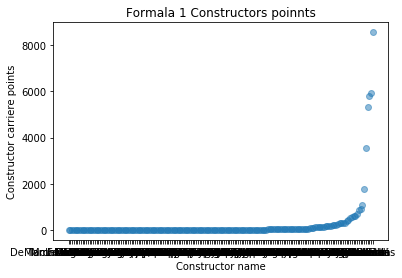

In [27]:
######graphe a modifier avec plus de detailles (rajouter une colonne continent, mettre diffrente couleur en fonction du continent, agradir le tableau pour avoir une absicse lisible)##### 
#graphe de description
plt.scatter(result_const['name'],result_const['points'], alpha=0.5)  # alpha chances the transparency
#titre et legendes
plt.title('Formala 1 Constructors poinnts')
plt.xlabel('Constructor name')
plt.ylabel('Constructor carriere points')
#affichage du graph
plt.show()

## Nous allons maintenant nous occuper de la partie 'result'

In [28]:
#visualisation de la forme du dataframe 
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [29]:
#affichons la dataframe des drivers
df_drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


In [30]:
#recuperation des noms prenom et id du driver
name = ['driverId', 'forename', 'surname']
driver_name = df_drivers[name]
driver_name

,driverId,forename,surname
0,1,Lewis,Hamilton
1,2,Nick,Heidfeld
2,3,Nico,Rosberg
3,4,Fernando,Alonso
4,5,Heikki,Kovalainen
...,...,...,...
848,850,Pietro,Fittipaldi
849,851,Jack,Aitken
850,852,Yuki,Tsunoda
851,853,Nikita,Mazepin


In [31]:
#réalisation d'un merge entre les dataframes drivers name et df_result
new_result = df_results.merge(driver_name, how='inner', on='driverId')  
new_result

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,forename,surname
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Lewis,Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1,Lewis,Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,56,\N,\N,25,19,1:35.520,203.969,11,Lewis,Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1,Lewis,Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1,Lewis,Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25135,25062,1056,853,210,9,19,17,17,17,0.0,75,\N,\N,64,19,1:16.866,156.287,13,Nikita,Mazepin
25136,25079,1057,853,210,9,18,14,14,14,0.0,51,+14.315,8030725,40,19,1:47.747,200.569,1,Nikita,Mazepin
25137,25105,1059,853,210,9,18,20,20,20,0.0,52,\N,\N,34,20,1:39.317,211.758,11,Nikita,Mazepin
25138,25123,1058,853,210,9,20,18,18,18,0.0,68,\N,\N,39,19,1:10.951,219.092,13,Nikita,Mazepin


### Realisation d'une fonction de recupeation de stat de cours pour tous les drivers ou 1 seul 

Le but va aussi être de merge le dataframe ci-dessus avec un les circuits sur lequels ont lieu les course

Dans un premier temps recuperons les informations qui nous interresse depuis les dataframe 'circuits', 'result', 'constructor', 'race'

In [32]:
df_races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [33]:
#creation de la nouvelle df de race
columns_race = ['raceId', 'circuitId', 'name', 'date']
race_info = df_races[columns_race]
race_info = race_info.rename(columns={"name": "GP_name",
                                      "date" : "GP_date"})
race_info.head()

,raceId,circuitId,GP_name,GP_date
0,1,1,Australian Grand Prix,2009-03-29
1,2,2,Malaysian Grand Prix,2009-04-05
2,3,17,Chinese Grand Prix,2009-04-19
3,4,3,Bahrain Grand Prix,2009-04-26
4,5,4,Spanish Grand Prix,2009-05-10


In [34]:
#creation de la nouvelle df de cicuit
columns_circuits = ['circuitId', 'name']
circuits_info = df_circuits[columns_circuits]
circuits_info = circuits_info.rename(columns={"name": "circuit_name"})
circuits_info.head()

,circuitId,circuit_name
0,73,Baku City Circuit
1,35,Korean International Circuit
2,71,Sochi Autodrom
3,24,Yas Marina Circuit
4,72,Port Imperial Street Circuit


In [35]:
#creation de la nouvelle df de constructeur
columns_constructors = ['constructorId', 'name']
constructor_info = df_constructors[columns_constructors]
constructor_info = constructor_info.rename(columns={"name": "constructor_name"})
constructor_info.head()

,constructorId,constructor_name
0,1,McLaren
1,1,McLaren
2,1,McLaren
3,1,McLaren
4,1,McLaren


#### Les merges

Le premier merge consistera a fusionner 'circuits_info' et 'race_info' par rapport au 'circuitId'

In [36]:
#merge et changement de l'ordre des colonnes de 'race_info'
race_info = race_info.merge(circuits_info, how='inner', on='circuitId')
new_race_columns = ['raceId',
                    'GP_name',
                    'circuit_name',
                    'GP_date'] 
race_info = race_info[new_race_columns]
race_info

,raceId,GP_name,circuit_name,GP_date
0,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009-03-29
1,18,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
2,36,Australian Grand Prix,Albert Park Grand Prix Circuit,2007-03-18
3,55,Australian Grand Prix,Albert Park Grand Prix Circuit,2006-04-02
4,71,Australian Grand Prix,Albert Park Grand Prix Circuit,2005-03-06
...,...,...,...,...
1053,1057,Azerbaijan Grand Prix,Baku City Circuit,2021-06-06
1054,1039,Tuscan Grand Prix,Autodromo Internazionale del Mugello,2020-09-13
1055,1042,Portuguese Grand Prix,Autódromo Internacional do Algarve,2020-10-25
1056,1054,Portuguese Grand Prix,Autódromo Internacional do Algarve,2021-05-02


Nous allons maintenant merge les df 'constructor_info', 'race_info' et 'df_result' concecutivement

In [37]:
#################################
#  ATTENTION LE TEMPS D'EXECUTION DE CETTE CELLULES ET RELATIVEMENT LONG 
#  EN RAISON DU NOMBRE D'OPERATION REALISE
################################# 
#merge avec 'circuit_info'
new_result = new_result.merge(constructor_info, how='inner', on='constructorId')  
#merge avec 'race_info'
new_result = new_result.merge(race_info, how='inner', on='raceId')
#affichage du nouveau 'new_result' et remise en ordre des indexs
new_result.drop_duplicates().reset_index()

,index,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,...,rank,fastestLapTime,fastestLapSpeed,statusId,forename,surname,constructor_name,GP_name,circuit_name,GP_date
0,0,1,18,1,1,22,1,1,1,1,...,2,1:27.452,218.300,1,Lewis,Hamilton,McLaren,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
1,848,5,18,5,1,23,3,5,5,5,...,1,1:27.418,218.385,1,Heikki,Kovalainen,McLaren,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
2,1696,2,18,2,2,3,5,2,2,2,...,3,1:27.739,217.586,1,Nick,Heidfeld,BMW Sauber,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
3,1767,9,18,9,2,4,2,\N,R,9,...,9,1:28.753,215.100,4,Robert,Kubica,BMW Sauber,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
4,1838,3,18,3,3,7,7,3,3,3,...,5,1:28.090,216.719,1,Nico,Rosberg,Williams,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24847,8651061,19124,794,525,114,1,11,\N,R,24,...,\N,\N,\N,48,Jimmy,Bryan,Kuzma,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30
24848,8651063,19114,794,509,108,33,20,14,14,14,...,\N,\N,\N,19,Jim,Rathmann,Epperly,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30
24849,8651065,19115,794,528,109,12,21,\N,R,15,...,\N,\N,\N,7,Don,Freeland,Phillips,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30
24850,8651067,19113,794,513,111,83,32,13,13,13,...,\N,\N,\N,14,Eddie,Johnson,Trevis,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30


In [38]:
new_result.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'forename', 'surname',
       'constructor_name', 'GP_name', 'circuit_name', 'GP_date'],
      dtype='object')

In [39]:
#pour plus de lisibilité nous allons a prèsent fusionner les colonnes 'forename' et 'surname' dans une seul colonne
new_result['full_name'] = new_result['forename'] + ' ' + new_result['surname']
new_result = new_result.drop_duplicates().reset_index()
new_result

,index,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,...,fastestLapTime,fastestLapSpeed,statusId,forename,surname,constructor_name,GP_name,circuit_name,GP_date,full_name
0,0,1,18,1,1,22,1,1,1,1,...,1:27.452,218.300,1,Lewis,Hamilton,McLaren,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Lewis Hamilton
1,848,5,18,5,1,23,3,5,5,5,...,1:27.418,218.385,1,Heikki,Kovalainen,McLaren,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Heikki Kovalainen
2,1696,2,18,2,2,3,5,2,2,2,...,1:27.739,217.586,1,Nick,Heidfeld,BMW Sauber,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Nick Heidfeld
3,1767,9,18,9,2,4,2,\N,R,9,...,1:28.753,215.100,4,Robert,Kubica,BMW Sauber,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Robert Kubica
4,1838,3,18,3,3,7,7,3,3,3,...,1:28.090,216.719,1,Nico,Rosberg,Williams,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Nico Rosberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24847,8651061,19124,794,525,114,1,11,\N,R,24,...,\N,\N,48,Jimmy,Bryan,Kuzma,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30,Jimmy Bryan
24848,8651063,19114,794,509,108,33,20,14,14,14,...,\N,\N,19,Jim,Rathmann,Epperly,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30,Jim Rathmann
24849,8651065,19115,794,528,109,12,21,\N,R,15,...,\N,\N,7,Don,Freeland,Phillips,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30,Don Freeland
24850,8651067,19113,794,513,111,83,32,13,13,13,...,\N,\N,14,Eddie,Johnson,Trevis,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30,Eddie Johnson


In [40]:
new_result['raceId'].max()

1060

### Creation de la fonction de resultats par GP/drivers

In [41]:
#pour faciliter lutilisation de 'resulut_info' nous allons utiliser une fonction qui retourne le 'GP_name' ainsi que la 'GP_date'
#lorsqu'on lui place 'raceId' en argument
def gp_finder(race_id):
    """Cette fonction permet de rentrer l'id d'une course et d'avoir en retour
    le nom du grand prix ainsi que la date de celui-ci.
    Attention il est important que la 'race_id' soit contenu entre [1, 1060]
    
        arg : 'race_id' --> type 'int64'
        return : 'GP_name' & 'GP_date' type 'str'
    """
    gp_info_nd = new_result.loc[new_result['raceId'] == race_id, ['GP_name','GP_date']].drop_duplicates()
    #return gp_info_nd
    print("Il s'agit du '", gp_info_nd['GP_name'][0], "' qui a eu lieu le", gp_info_nd['GP_date'][0])
    
gp_finder(18)

Il s'agit du ' Australian Grand Prix ' qui a eu lieu le 2008-03-16


### /!\ WARNING /!\ : Pour le moment la fonction ne fonctionne qu'avec un seul driver, corriger pour pourvoir mettre une liste de drivers

In [42]:
#fonction retournant les information d'un GP en fonction de son ID ou de drivers en particulier si souhaite
def result_info(race_id, driver_name):
    """Cette fonction a ete creee pour pouvoir donner les resultat complet d'un GP si l'argument 'driver_name' et vide
    ou alors de donnée les resultat d'un GP pour un ou plusieurs driver
    
        arg : 'race_id' --> Id de du GP qui vous interressent type 'int64'
              'driver_mame' --> 'full_name' du ou des driver qui vous interresse type 'str' ou 'list'
        
        return : les info relative au GP : 'rank', 'grid', 'vitesse'...
    """
    #test de condition si l'argument 'driver_name' et vide ou non
    if driver_name == None:
        #recuperation de l'information de tous les drivers du GP (environ une 20 de ligne)
        gp_info_classement = new_result.loc[new_result['raceId'] == race_id, ['GP_name',
                                                                             'GP_date',
                                                                             'circuit_name',
                                                                             'full_name',
                                                                             'constructor_name',
                                                                             'grid',
                                                                             'points',
                                                                             'fastestLapTime',
                                                                             'fastestLapSpeed',
                                                                            ]]
        #retourne les info des drivers et les donne celon leur rank
        return gp_info_classement.sort_values(by=['grid'])
    #condition si le nom du drivers est reseigne
    else:
        #recuperation de l'information d'un seul driver pour le moment
        gp_info_driver = new_result.loc[(new_result['raceId'] == race_id) & (new_result['full_name'] == driver_name),
                                                                            ['GP_name',
                                                                             'GP_date',
                                                                             'circuit_name',
                                                                             'full_name',
                                                                             'constructor_name',
                                                                             'grid',
                                                                             'points',
                                                                             'fastestLapTime',
                                                                             'fastestLapSpeed',
                                                                            ]] 
        #deniere condition logique qui permet de verifier si la combinaison demander est possible
        #(si le driver a bien participé a cette course)
        #dans un premier temps on test si requette rpecedentes est vide si c'est le cas on dis que le driver n'a
        #jamais participé a ce GP
        if gp_info_driver.empty == True:
            return print("Ce driver n'a jamais participer a cette course.")
        #dans l'autre cas on retourne les information du driver relative ce GP
        else:
            return gp_info_driver

#test de la fonction avec un GP et un driver
result_info(18, 'Maxime bourgain')

Ce driver n'a jamais participer a cette course.


## Creation de fonction de scatter 'Driver' et 'Constructeurs'

Dans cette partie le but et de sera de créer des graph pour aider à la visualisation des information des dataframes

### Constructions des dataframes des scatters

Nous allons tout d'abord commencer par regrouper les informations qui nous interressent dans des dataframes pour les graphs qui suivrons

In [43]:
new_result.columns

Index(['index', 'resultId', 'raceId', 'driverId', 'constructorId', 'number',
       'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps',
       'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'forename', 'surname',
       'constructor_name', 'GP_name', 'circuit_name', 'GP_date', 'full_name'],
      dtype='object')

In [44]:
#creation du dataframe 'df_dinamic_driv_cons' a partir de colonnes recupere dans 'new_result' 
graph_dinamic_driv_cons = ['raceId','driverId', 'constructorId', 'full_name', 'constructor_name', 'points', 'position', 'GP_date']
df_dinamic_driv_cons = new_result[graph_dinamic_driv_cons]
df_dinamic_driv_cons = df_dinamic_driv_cons.drop_duplicates()
df_dinamic_driv_cons

,raceId,driverId,constructorId,full_name,constructor_name,points,position,GP_date
0,18,1,1,Lewis Hamilton,McLaren,10.0,1,2008-03-16
1,18,5,1,Heikki Kovalainen,McLaren,4.0,5,2008-03-16
2,18,2,2,Nick Heidfeld,BMW Sauber,8.0,2,2008-03-16
3,18,9,2,Robert Kubica,BMW Sauber,0.0,\N,2008-03-16
4,18,3,3,Nico Rosberg,Williams,6.0,3,2008-03-16
...,...,...,...,...,...,...,...,...
24847,794,525,114,Jimmy Bryan,Kuzma,0.0,\N,1955-05-30
24848,794,509,108,Jim Rathmann,Epperly,0.0,14,1955-05-30
24849,794,528,109,Don Freeland,Phillips,0.0,\N,1955-05-30
24850,794,513,111,Eddie Johnson,Trevis,0.0,13,1955-05-30


### Création des nouvelles colonnes

A présent nous allons créer les colonnes qui nous manque pour pouvoir créer les scatters

In [45]:
#ajout d'une colonne 'years' a partir de 'GP_date'
def recup_years():
    df_dinamic_driv_cons['years'] = df_dinamic_driv_cons['GP_date'].str[:4].astype(int)
    return df_dinamic_driv_cons

recup_years()

,raceId,driverId,constructorId,full_name,constructor_name,points,position,GP_date,years
0,18,1,1,Lewis Hamilton,McLaren,10.0,1,2008-03-16,2008
1,18,5,1,Heikki Kovalainen,McLaren,4.0,5,2008-03-16,2008
2,18,2,2,Nick Heidfeld,BMW Sauber,8.0,2,2008-03-16,2008
3,18,9,2,Robert Kubica,BMW Sauber,0.0,\N,2008-03-16,2008
4,18,3,3,Nico Rosberg,Williams,6.0,3,2008-03-16,2008
...,...,...,...,...,...,...,...,...,...
24847,794,525,114,Jimmy Bryan,Kuzma,0.0,\N,1955-05-30,1955
24848,794,509,108,Jim Rathmann,Epperly,0.0,14,1955-05-30,1955
24849,794,528,109,Don Freeland,Phillips,0.0,\N,1955-05-30,1955
24850,794,513,111,Eddie Johnson,Trevis,0.0,13,1955-05-30,1955


In [46]:
#verification des classement dans chaque GP
test = ['rank', 'grid', 'position', 'points', 'constructor_name', 'GP_name', 'circuit_name', 'GP_date', 'full_name']
new_result[test][:22].sort_values(by=['points'])

,rank,grid,position,points,constructor_name,GP_name,circuit_name,GP_date,full_name
21,8,10,\N,0.0,Honda,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Rubens Barrichello
19,\N,16,\N,0.0,Force India,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Giancarlo Fisichella
18,17,22,\N,0.0,Force India,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Adrian Sutil
3,9,2,\N,0.0,BMW Sauber,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Robert Kubica
17,\N,14,\N,0.0,Red Bull,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Mark Webber
16,11,8,\N,0.0,Red Bull,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,David Coulthard
15,\N,21,\N,0.0,Super Aguri,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Anthony Davidson
7,16,20,\N,0.0,Renault,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Nelson Piquet Jr.
9,6,4,\N,0.0,Ferrari,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Felipe Massa
20,\N,12,\N,0.0,Honda,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Jenson Button


In [47]:
#trie du df rapport a la date et au resultat de la course
df_dinamic_driv_cons = df_dinamic_driv_cons.sort_values(by=['GP_date', 'points'])
df_dinamic_driv_cons

,raceId,driverId,constructorId,full_name,constructor_name,points,position,GP_date,years
24294,833,579,51,Juan Fangio,Alfa Romeo,0.0,\N,1950-05-13,1950
24298,833,589,105,Louis Chiron,Maserati,0.0,\N,1950-05-13,1950
24299,833,640,105,Toulo de Graffenried,Maserati,0.0,\N,1950-05-13,1950
24300,833,669,105,Prince Bira,Maserati,0.0,\N,1950-05-13,1950
24301,833,747,105,David Murray,Maserati,0.0,\N,1950-05-13,1950
...,...,...,...,...,...,...,...,...,...
19978,1060,832,6,Carlos Sainz,Ferrari,10.0,5,2021-07-04,2021
19974,1060,1,131,Lewis Hamilton,Mercedes,12.0,4,2021-07-04,2021
19973,1060,846,1,Lando Norris,McLaren,15.0,3,2021-07-04,2021
19975,1060,822,131,Valtteri Bottas,Mercedes,18.0,2,2021-07-04,2021


A présent l'objectif est de compter le nnombre de point ainsi que le nombre de victoire par driver

Regrouper les informations dans des plus petite df (2 colonne) pour ensuite les transformaer en dictionnaire et les ajouter a 'df_dinamic_driv_cons'

In [48]:
#utilisation de la fonction 'groupby' sur laquelle on applique la 'count' sur 
driver_points = df_dinamic_driv_cons.groupby('full_name').agg({'points':'sum'}).reset_index()
driver_points.sort_values(by=['points'])#.loc[driver_points['full_name'] == 'Lewis Hamilton']#verification pour un driver souhaité

,full_name,points
0,Adolfo Cruz,0.0
466,Kevin Cogan,0.0
465,Kenny Acheson,0.0
464,Kenneth McAlpine,0.0
463,Ken Wharton,0.0
...,...,...
776,Valtteri Bottas,1604.0
468,Kimi Räikkönen,1864.0
237,Fernando Alonso,1919.0
715,Sebastian Vettel,3048.0


In [49]:
#creation d'un dictionnaire a partir de ce df
#.set_index('state').to_dict()['name']
dico_point_driver = driver_points.set_index('full_name').to_dict()['points']

In [50]:
#ajout de la nouvelle colonne qui repertories les points par driver
df_dinamic_driv_cons['points_drivers'] = df_dinamic_driv_cons.apply(lambda row: dico_point_driver[row['full_name']], axis = 1)
df_dinamic_driv_cons

,raceId,driverId,constructorId,full_name,constructor_name,points,position,GP_date,years,points_drivers
24294,833,579,51,Juan Fangio,Alfa Romeo,0.0,\N,1950-05-13,1950,279.14
24298,833,589,105,Louis Chiron,Maserati,0.0,\N,1950-05-13,1950,4.00
24299,833,640,105,Toulo de Graffenried,Maserati,0.0,\N,1950-05-13,1950,9.00
24300,833,669,105,Prince Bira,Maserati,0.0,\N,1950-05-13,1950,8.00
24301,833,747,105,David Murray,Maserati,0.0,\N,1950-05-13,1950,0.00
...,...,...,...,...,...,...,...,...,...,...
19978,1060,832,6,Carlos Sainz,Ferrari,10.0,5,2021-07-04,2021,432.00
19974,1060,1,131,Lewis Hamilton,Mercedes,12.0,4,2021-07-04,2021,3928.00
19973,1060,846,1,Lando Norris,McLaren,15.0,3,2021-07-04,2021,247.00
19975,1060,822,131,Valtteri Bottas,Mercedes,18.0,2,2021-07-04,2021,1604.00


In [51]:
#mise a l'echelle logarithmique avec remise a 0 des valeur '< 0'
df_dinamic_driv_cons['points_drivers_log'] = np.log(df_dinamic_driv_cons['points_drivers']) 
df_dinamic_driv_cons['points_drivers_log'].loc[df_dinamic_driv_cons['points_drivers_log'] < 0] = 0
df_dinamic_driv_cons

C:\Users\romai\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\romai\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,raceId,driverId,constructorId,full_name,constructor_name,points,position,GP_date,years,points_drivers,points_drivers_log
24294,833,579,51,Juan Fangio,Alfa Romeo,0.0,\N,1950-05-13,1950,279.14,5.631713
24298,833,589,105,Louis Chiron,Maserati,0.0,\N,1950-05-13,1950,4.00,1.386294
24299,833,640,105,Toulo de Graffenried,Maserati,0.0,\N,1950-05-13,1950,9.00,2.197225
24300,833,669,105,Prince Bira,Maserati,0.0,\N,1950-05-13,1950,8.00,2.079442
24301,833,747,105,David Murray,Maserati,0.0,\N,1950-05-13,1950,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
19978,1060,832,6,Carlos Sainz,Ferrari,10.0,5,2021-07-04,2021,432.00,6.068426
19974,1060,1,131,Lewis Hamilton,Mercedes,12.0,4,2021-07-04,2021,3928.00,8.275886
19973,1060,846,1,Lando Norris,McLaren,15.0,3,2021-07-04,2021,247.00,5.509388
19975,1060,822,131,Valtteri Bottas,Mercedes,18.0,2,2021-07-04,2021,1604.00,7.380256


### Calcule du nombre de course couru et du nombre de victoire 

Nous allons dans un premier temps compter les nombre de course réalisé par un driver

In [52]:
nb_race = df_dinamic_driv_cons.groupby('full_name').agg({'driverId':'count'}).reset_index()
nb_race = nb_race.sort_values(by=['driverId']).reset_index()
#rename columns
#rename columns for easiest understanding
nb_race.rename(columns = {'driverId':'number_race'}, inplace = True)
rename_nb_race = ['full_name', 'number_race']
nb_race = nb_race[rename_nb_race]
#'nb_race' nouvelle dataframe qui contient le nombre de course disputé par un driver au cours de ca cariere
nb_race

,full_name,number_race
0,Adolfo Cruz,1
1,Giovanni de Riu,1
2,Graham McRae,1
3,Gus Hutchison,1
4,Guy Tunmer,1
...,...,...
798,Michael Schumacher,308
799,Jenson Button,309
800,Fernando Alonso,323
801,Rubens Barrichello,326


In [53]:
#créationd d'une fonction de création de dictionnaire a partir de 2 colonnes d'un dataframe
def df_to_dico(dico_name, df, column_key, column_value):
    """fonction qui permet la création de dictionnaire a partir de colonnes de dataframe
            argument : 
               - 'dico_name' type str, est le nom que vous donnez a votre dictionnaire
               - 'df' type dataframe, est le dataframe que vous voulez transformer en dictionnaire
               - 'column_key' type str, la colonne du dataframe qui servira de 'key'
               - 'column_value' type str, la colonne du dataframe qui servira de 'value'
               
            retour : 
               - retourne un dictionnaire qui a pour keys et values les infos rentré en argument 
    """
    dico_name = df.set_index(column_key).to_dict()[column_value]
    return dico_name

dico_nb_race = {}
dico_nb_race = df_to_dico(dico_nb_race, nb_race, 'full_name', 'number_race')

In [54]:
#ajout de la nouvelle colonne qui repertories le nombre de course par driver
df_dinamic_driv_cons['nombre_race'] = df_dinamic_driv_cons.apply(lambda row: dico_nb_race[row['full_name']], axis = 1)
df_dinamic_driv_cons

,raceId,driverId,constructorId,full_name,constructor_name,points,position,GP_date,years,points_drivers,points_drivers_log,nombre_race
24294,833,579,51,Juan Fangio,Alfa Romeo,0.0,\N,1950-05-13,1950,279.14,5.631713,57
24298,833,589,105,Louis Chiron,Maserati,0.0,\N,1950-05-13,1950,4.00,1.386294,10
24299,833,640,105,Toulo de Graffenried,Maserati,0.0,\N,1950-05-13,1950,9.00,2.197225,23
24300,833,669,105,Prince Bira,Maserati,0.0,\N,1950-05-13,1950,8.00,2.079442,17
24301,833,747,105,David Murray,Maserati,0.0,\N,1950-05-13,1950,0.00,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
19978,1060,832,6,Carlos Sainz,Ferrari,10.0,5,2021-07-04,2021,432.00,6.068426,128
19974,1060,1,131,Lewis Hamilton,Mercedes,12.0,4,2021-07-04,2021,3928.00,8.275886,275
19973,1060,846,1,Lando Norris,McLaren,15.0,3,2021-07-04,2021,247.00,5.509388,47
19975,1060,822,131,Valtteri Bottas,Mercedes,18.0,2,2021-07-04,2021,1604.00,7.380256,166


In [55]:
#ces 2 lignes permettent de remplacer '\N' par 0 car '\N' est une str particiliere  
df_dinamic_driv_cons.position =  df_dinamic_driv_cons.position.replace(r'\s+|\\N', '0', regex=True) 
df_dinamic_driv_cons.position =  df_dinamic_driv_cons.position.astype(int)

Dans un second temps on va compter le nombre de victoire par driver

In [56]:
#fonction permettant de compter le nombre de victoire de chaque driver dans l'histoire de la F1
def count_victory(df, column_interest, column_agg, function_apply, new_col_name):
    """fonction qui permet de compter le nombre de victoire de driver, constructeur...
            arguments :
                - 'df' type datframe : permet de renseigner la dataframe dans laquel vous voulez travailler
                - 'column_interest' type str : permet de renseigner la colonne par rapport a laquel vous souhaitez 
                                               compter le nombre de victoire
                                               
            retour : 'df_group' type dataframe : retourne une dataframe qui a 1 colonne du nom et le nombre de victoire
                                                 en fonction de la prmiere colonne                            
    """
    df_group =  df[df.position==1][[column_interest, column_agg]]
    df_group = df_group.groupby(column_interest).agg({column_agg:function_apply}).reset_index()
    df_group.rename(columns = {column_agg:new_col_name}, inplace = True)
    rename_nb_win = [column_interest, new_col_name]
    df_group = df_group[rename_nb_win]
    
    return df_group

finish_1 = count_victory(df_dinamic_driv_cons, 'full_name', 'position', 'count', 'number_victory')
constructor_victory = count_victory(df_dinamic_driv_cons, 'constructor_name', 'position', 'count', 'number_constru_victory')
#constructor_victory#le nombre de victoire par écurie a lui l'aire coérent 

In [57]:
#df_dinamic_driv_cons.position.value_counts()

In [58]:
#creation d'un dictionnaire a partir des 2 colonnes du dataframe genere precedement
dico_nb_win = {}
dico_nb_win = df_to_dico(dico_nb_win, finish_1, 'full_name', 'number_victory')

#creation d'un dictionnaire avec de value vide
driver_points = df_dinamic_driv_cons[:][['full_name', 'position']]
driver_points['position'] = 0
driver_points
dico_zero = {}
dico_zero = df_to_dico(dico_zero, driver_points, 'full_name', 'position')

Merge des 2 dictionnaire créée si dessus

In [59]:
dico_zero.update(dico_nb_win)
dico_nb_win = dico_zero

In [60]:
#fonction permtant d'intergrer une colonne dans un datframe
def intergre_df_columns(df, dico, column_to_compute, column_computed):
    """Fonction permettant d'integrer des valeurs dans une nouvelle colonne en fonction des valeurs d'autre(s) colonne(s)
       a partir d'un dictionnaire créée précédement (vous pouvez utiliser la fonction 'df_to_dico(,,,)' pour créer des dico à
       partir de 2 colonnes de dataframe).
       
       argument :
           - 'df' type dataframe : dataframe dans lequel vous allez créer une nouvelle colonne
           - 'dico' type dictionnaire : dictionnaire qui posséde 'column_computed' en clée et 'column_to_compute' en value
                                        (vous pouvez utiliser la fonction 'df_to_dico(,,,)' pour créer des dico à partir
                                        de 2 colonnes de dataframe)
           - 'column_to_compute' type str : nom de la colonnes par rapport à laquelle vous voulez créer la nouvelle colonne
           - 'column_computed' type str : nom la colonne que vous voulez créer 
       retour :
           - 'df' type dataframe : dataframe dans lequel vous ajouté une nouvelle colonne
    """
    
    df[column_computed] = df.apply(lambda row: dico[row[column_to_compute]], axis = 1)
    return df

df_dinamic_driv_cons = intergre_df_columns(df_dinamic_driv_cons, dico_nb_win, 'full_name', 'nombre_win')
df_dinamic_driv_cons

,raceId,driverId,constructorId,full_name,constructor_name,points,position,GP_date,years,points_drivers,points_drivers_log,nombre_race,nombre_win
24294,833,579,51,Juan Fangio,Alfa Romeo,0.0,0,1950-05-13,1950,279.14,5.631713,57,24
24298,833,589,105,Louis Chiron,Maserati,0.0,0,1950-05-13,1950,4.00,1.386294,10,0
24299,833,640,105,Toulo de Graffenried,Maserati,0.0,0,1950-05-13,1950,9.00,2.197225,23,0
24300,833,669,105,Prince Bira,Maserati,0.0,0,1950-05-13,1950,8.00,2.079442,17,0
24301,833,747,105,David Murray,Maserati,0.0,0,1950-05-13,1950,0.00,0.000000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,1060,832,6,Carlos Sainz,Ferrari,10.0,5,2021-07-04,2021,432.00,6.068426,128,0
19974,1060,1,131,Lewis Hamilton,Mercedes,12.0,4,2021-07-04,2021,3928.00,8.275886,275,98
19973,1060,846,1,Lando Norris,McLaren,15.0,3,2021-07-04,2021,247.00,5.509388,47,0
19975,1060,822,131,Valtteri Bottas,Mercedes,18.0,2,2021-07-04,2021,1604.00,7.380256,166,9


In [61]:
#fonction permettant de compter le nobre de point inscrit dans l'histoir par un driver ou une ecurie
def count_points(df, column_interest):
    """Fonction permettant de compter le nombre de point inscrit en F1 par tous les drives/écuries
       
       arguments :
           -
       retour :
           - 
    """
    #utilisation de la fonction 'groupby' sur laquelle on applique la 'count' sur 
#     driver_points = df_dinamic_driv_cons.groupby('full_name').agg({'points':'sum'}).reset_index()
#     driver_points.sort_values(by=['points'])#.loc[driver_points['full_name'] == 'Lewis Hamilton']#verification pour un driver souhaité
    
    df_group = df.groupby(column_interest).agg({'points':'sum'}).reset_index()
    df_group.rename(columns = {'points':'number_points'}, inplace = True)
    rename_nb_win = [column_interest, 'number_points']
    df_group = df_group[rename_nb_win]
    
    return df_group.sort_values(by=['number_points']).reset_index()

constru_point = count_points(df_dinamic_driv_cons, 'constructor_name')
constru_point


,index,constructor_name,number_points
0,123,Moore,0.00
1,108,Martini,0.00
2,59,Ferguson,0.00
3,58,Ewing,0.00
4,57,Euro Brun,0.00
...,...,...,...
170,172,Williams,3567.00
171,139,Red Bull,5329.50
172,114,McLaren,5864.50
173,119,Mercedes,6066.14


Dans cette cellules il y a un probleme avec le nombre de points accumulé par constructeurs. Ce problème est mis en évidence 
dans la cellule suivante. le probleme dans ce cas dois lier au donnée car on ne compte plus en fonction du constructeurs mais 
des points mis par un driver dans une écurie.  
Il doit donc y avoir des probleme de coérence entre les point mis mis par les 
drivers dans certaine écurie. Si le probleme n'est pas la il dois alors venir de duplication, ce qui est bizarre car le 
nombre de points par drivers est lui correcte.  
***INFO A VERIFIER***

On peut déjà constater que 'Lotus F1' et 'Team Lotus' sont différencier alors qu'elle rempresente la meme équipe	

In [62]:
test = pd.concat([constru_point, result_const], axis=1)
#test[160:]

### Technique de comptage dinamique

Tentons une nouvelle technique qui nous permeterai de trouver un moyenne de compter le nombre de points/victoire de façon progressive au cours du temps.  
Pour les drivers comme pour les écuries.

In [63]:
#premiere tentavive a partir du dataframe 'df_dinamic_driv_cons'
df_dinamic_driv_cons[24821:]

,raceId,driverId,constructorId,full_name,constructor_name,points,position,GP_date,years,points_drivers,points_drivers_log,nombre_race,nombre_win
19976,1060,847,3,George Russell,Williams,0.0,11,2021-07-04,2021,3.0,1.098612,47,0
19977,1060,849,3,Nicholas Latifi,Williams,0.0,16,2021-07-04,2021,0.0,0.000000,26,0
19981,1060,839,214,Esteban Ocon,Alpine F1 Team,0.0,0,2021-07-04,2021,210.0,5.347108,76,0
19982,1060,8,51,Kimi Räikkönen,Alfa Romeo,0.0,15,2021-07-04,2021,1864.0,7.530480,341,21
19983,1060,841,51,Antonio Giovinazzi,Alfa Romeo,0.0,14,2021-07-04,2021,19.0,2.944439,49,0
19986,1060,20,117,Sebastian Vettel,Aston Martin,0.0,17,2021-07-04,2021,3048.0,8.022241,267,53
19987,1060,840,117,Lance Stroll,Aston Martin,0.0,13,2021-07-04,2021,156.0,5.049856,87,0
19988,1060,854,210,Mick Schumacher,Haas F1 Team,0.0,18,2021-07-04,2021,0.0,0.000000,9,0
19989,1060,853,210,Nikita Mazepin,Haas F1 Team,0.0,19,2021-07-04,2021,0.0,0.000000,9,0
19991,1060,852,213,Yuki Tsunoda,AlphaTauri,0.0,12,2021-07-04,2021,9.0,2.197225,9,0


Pour mettre en place cette technique il faut s'assurer que de dataframe est deja trier par date.  
Dans notre cas c'est déjà fait.

In [64]:
#mise ne place de la technique
df_dinamic_driv_cons["cum_points"] = df_dinamic_driv_cons.groupby(['full_name'])['points'].cumsum(axis=0)
#df_dinamic_driv_cons

La colonne a bien été créée à présent assurons nous que les résultats sont coérenh pour un driver

In [65]:
#cellule de test pour calculer le nombre de point au cour du temps
# df_dinamic_driv_cons.loc[df_dinamic_driv_cons['full_name'] == 'Lewis Hamilton', ['points',
#                                                                               'cum_points',
#                                                                               'constructor_name',
#                                                                               'GP_date',
#                                                                               'full_name']]

A partir de cette methode tentons de créer une fonction qui nous permettra de faire la meme chose.

In [66]:
#fonction permettant de compter le nobre de point inscrit dans l'histoir par un driver ou une ecurie
def count_points(df, column_interest, new_col_name):
    """Fonction permettant de compter le nombre de point inscrit en F1 par tous les drives/écuries de façon dynamique au
       cours du temps
       arguments :
           -
       retour :
           - 
    """
    df[new_col_name] = df.groupby([column_interest])['points'].cumsum(axis=0)
    return df

In [67]:
#test de la fonction du dessus pour les constructeurs
count_points(df_dinamic_driv_cons, 'constructor_name', 'cum_constru_points')

#cellule de test pour calculer le nombre de point au cour du temps
# df_dinamic_driv_cons.loc[df_dinamic_driv_cons['constructor_name'] == 'Alpine F1 Team', ['points',
#                                                                               'cum_constru_points',
#                                                                               'constructor_name',
#                                                                               'GP_date',
#                                                                               'full_name']]

,raceId,driverId,constructorId,full_name,constructor_name,points,position,GP_date,years,points_drivers,points_drivers_log,nombre_race,nombre_win,cum_points,cum_constru_points
24294,833,579,51,Juan Fangio,Alfa Romeo,0.0,0,1950-05-13,1950,279.14,5.631713,57,24,0.0,0.00
24298,833,589,105,Louis Chiron,Maserati,0.0,0,1950-05-13,1950,4.00,1.386294,10,0,0.0,0.00
24299,833,640,105,Toulo de Graffenried,Maserati,0.0,0,1950-05-13,1950,9.00,2.197225,23,0,0.0,0.00
24300,833,669,105,Prince Bira,Maserati,0.0,0,1950-05-13,1950,8.00,2.079442,17,0,0.0,0.00
24301,833,747,105,David Murray,Maserati,0.0,0,1950-05-13,1950,0.00,0.000000,4,0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,1060,832,6,Carlos Sainz,Ferrari,10.0,5,2021-07-04,2021,432.00,6.068426,128,0,432.0,9414.77
19974,1060,1,131,Lewis Hamilton,Mercedes,12.0,4,2021-07-04,2021,3928.00,8.275886,275,98,3928.0,6048.14
19973,1060,846,1,Lando Norris,McLaren,15.0,3,2021-07-04,2021,247.00,5.509388,47,0,247.0,5864.50
19975,1060,822,131,Valtteri Bottas,Mercedes,18.0,2,2021-07-04,2021,1604.00,7.380256,166,9,1604.0,6066.14


Création d'une fonction permettant de compter le nombre de victoire par driver/constructeur.

In [68]:
#cellule de test avant la création de la fonction
df_group = df_dinamic_driv_cons[df_dinamic_driv_cons.position==1]
df_dinamic_driv_cons['victory_driv_count'] = df_group.groupby(['full_name'])['position'].cumcount() + 1

In [69]:
#fonction permettant de compter le nobre de point inscrit dans l'histoir par un driver ou une ecurie
def count_victory(df, column_interest, new_col_name):
    """Fonction permettant de compter le nombre de point inscrit en F1 par tous les drives/écuries de façon dynamique au
       cours du temps
       arguments :
           -
       retour :
           - 
    """
    df_group = df[df.position==1]
    df[new_col_name] = df_group.groupby([column_interest])['position'].cumcount() + 1
    
    return df

In [70]:
#comptage du nombre de victoire par constructeur
count_victory(df_dinamic_driv_cons, 'constructor_name', 'victory_constru_count')

,raceId,driverId,constructorId,full_name,constructor_name,points,position,GP_date,years,points_drivers,points_drivers_log,nombre_race,nombre_win,cum_points,cum_constru_points,victory_driv_count,victory_constru_count
24294,833,579,51,Juan Fangio,Alfa Romeo,0.0,0,1950-05-13,1950,279.14,5.631713,57,24,0.0,0.00,NaN,NaN
24298,833,589,105,Louis Chiron,Maserati,0.0,0,1950-05-13,1950,4.00,1.386294,10,0,0.0,0.00,NaN,NaN
24299,833,640,105,Toulo de Graffenried,Maserati,0.0,0,1950-05-13,1950,9.00,2.197225,23,0,0.0,0.00,NaN,NaN
24300,833,669,105,Prince Bira,Maserati,0.0,0,1950-05-13,1950,8.00,2.079442,17,0,0.0,0.00,NaN,NaN
24301,833,747,105,David Murray,Maserati,0.0,0,1950-05-13,1950,0.00,0.000000,4,0,0.0,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,1060,832,6,Carlos Sainz,Ferrari,10.0,5,2021-07-04,2021,432.00,6.068426,128,0,432.0,9414.77,NaN,NaN
19974,1060,1,131,Lewis Hamilton,Mercedes,12.0,4,2021-07-04,2021,3928.00,8.275886,275,98,3928.0,6048.14,NaN,NaN
19973,1060,846,1,Lando Norris,McLaren,15.0,3,2021-07-04,2021,247.00,5.509388,47,0,247.0,5864.50,NaN,NaN
19975,1060,822,131,Valtteri Bottas,Mercedes,18.0,2,2021-07-04,2021,1604.00,7.380256,166,9,1604.0,6066.14,NaN,NaN


Dans les 2 colonnes remplacer les :  
- *'NaN'* par la dernière valeur prise par un driver ou une écurie  
  
  
Le faire dans la fonction *'count_points(,,)'* et *'count_victory(,,)'* 

In [71]:
#replacement de 'Nan' par '0'  
# df_dinamic_driv_cons = df_dinamic_driv_cons.fillna(0)

### Creation des graphs dynamics 

Dans cette partie le but sera de créer 2 graphs différent :  
    - Graph drivers
    - Graph constructeurs

In [72]:
# px.scatter(df_dinamic_driv_cons, x="nombre_race", y="nombre_win", animation_frame="years",
#            animation_group="full_name", size="victory_driv_count", color="constructor_name",
#            hover_name="constructor_name",
#            log_x=True, size_max=55, range_x=[0,360], range_y=[0,105])

## Graph dynamique du nombre de course sur chaque circuit 

Il faut déduire les informations dont nous avons besoin pour réaliser ce graph.

info a récupérer :  
- longitude
- latitude
- nom_circuit
- nom_GP
- nb_GP
- meilleur_performance *(en option)*
- url

Visualisation des dataframe qui possendent les info suceptible de nous interressé

In [73]:
df_circuits.head()

,circuitId,Ref_circuit,name,city,country,latitude,longitude,altitude,continents,colors
0,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.3725,49.8533,-7,Asia,#F26230
1,35,yeongam,Korean International Circuit,Yeongam County,Korea,34.7333,126.4170,0,Asia,#F26230
2,71,sochi,Sochi Autodrom,Sochi,Russia,43.4057,39.9578,2,Asia,#F26230
3,24,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3,Asia,#F26230
4,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.7769,-74.0111,4,North_America,#223D96


In [74]:
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [75]:
df_races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


Récuperation des champs qui nous interressent dans les dataframe si-dessus 

In [76]:
#recuperation des informations de 'df_circuits'
list_circuit = ['circuitId', 'name', 'country', 'latitude', 'longitude', 'continents']
new_circuit_df = df_circuits[list_circuit]

#recuperation des infos de 'df_result'
list_result = ['driverId', 'raceId', 'laps', 'time', 'fastestLapTime', 'fastestLapSpeed']
new_result_df = df_results[list_result]#creation de la nouvelle dataframe de résultat

#recuperation des infos de 'df_races'
list_races = ['raceId', 'year', 'name', 'circuitId', 'url']
new_race_df = df_races[list_races]#creation de la nouvelle dataframe des races
new_race_df = new_race_df.rename(columns = {'name' : 'GP_name'})

### Merge progressif des différents dataframe

Dans cette partie la le but sera de merge progressivement chaque dataframe les uns avec les autres.

In [77]:
#merge de dataframe race et circuits par rapport a l'id circuit
new_race_df = new_race_df.merge(new_circuit_df, how = 'inner', on = 'circuitId').sort_values(by=['year'])
new_race_df.head()

,raceId,year,GP_name,circuitId,url,name,country,latitude,longitude,continents
228,833,1950,British Grand Prix,9,http://en.wikipedia.org/wiki/1950_British_Gran...,Silverstone Circuit,UK,52.0786,-1.01694,Europe
436,839,1950,Italian Grand Prix,14,http://en.wikipedia.org/wiki/1950_Italian_Gran...,Autodromo Nazionale di Monza,Italy,45.6156,9.28111,Europe
165,834,1950,Monaco Grand Prix,6,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,Circuit de Monaco,Monaco,43.7347,7.42056,Europe
994,838,1950,French Grand Prix,55,http://en.wikipedia.org/wiki/1950_French_Grand...,Reims-Gueux,France,49.2542,3.93083,Europe
365,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe


In [78]:
#merge de dataframe race et result par rapport a l'id race
merge_race_result = new_race_df.merge(new_result_df, how = 'inner', on = 'raceId').sort_values(by=['year'])
merge_race_result.head()

,raceId,year,GP_name,circuitId,url,name,country,latitude,longitude,continents,driverId,laps,time,fastestLapTime,fastestLapSpeed
0,833,1950,British Grand Prix,9,http://en.wikipedia.org/wiki/1950_British_Gran...,Silverstone Circuit,UK,52.0786,-1.01694,Europe,642,70,2:13:23.6,\N,\N
102,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,780,29,\N,\N,\N
103,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,774,22,\N,\N,\N
104,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,793,20,\N,\N,\N
105,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,741,15,\N,\N,\N


Ajout du non de driver en fonction de leur ID grace a la fonction **'intergre_df_columns'**

In [79]:
#creation d'une colonne 'full_name' dans le dataframe de resultat
df_drivers["full_name"] = df_drivers["forename"] + " " + df_drivers["surname"]

In [80]:
#création d'un dictionnaire des ID avec le full_name des drivers
list_dico_driver = ['driverId', 'full_name']
df_dico_nom_dri = df_drivers[list_dico_driver].drop_duplicates().reset_index()
dico_driver_name = df_to_dico('dico_driver_name', df_dico_nom_dri, 'driverId', 'full_name')
#df_drivers.loc[df_drivers.driverId == , ['driverId', 'forename', 'surname']]

intergre_df_columns(merge_race_result, dico_driver_name, 'driverId', 'full_name')
merge_race_result.head()

,raceId,year,GP_name,circuitId,url,name,country,latitude,longitude,continents,driverId,laps,time,fastestLapTime,fastestLapSpeed,full_name
0,833,1950,British Grand Prix,9,http://en.wikipedia.org/wiki/1950_British_Gran...,Silverstone Circuit,UK,52.0786,-1.01694,Europe,642,70,2:13:23.6,\N,\N,Nino Farina
102,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,780,29,\N,\N,\N,Toni Branca
103,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,774,22,\N,\N,\N,Eugène Chaboud
104,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,793,20,\N,\N,\N,Raymond Sommer
105,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,741,15,\N,\N,\N,Philippe Étancelin


Pour pouvoir travailler plus simplement avec le dataframe **'merge_race_result'** nous allons regarder le *type* de chaques colonnes  

In [81]:
merge_race_result.dtypes

raceId               int64
year                 int64
GP_name             object
circuitId            int64
url                 object
name                object
country             object
latitude           float64
longitude          float64
continents          object
driverId             int64
laps                 int64
time                object
fastestLapTime      object
fastestLapSpeed     object
full_name           object
dtype: object

On voit que les colonnes ***'fastestLapTime'*** et ***'fastestLapSpeed'*** sont *'object'* alors qu'on attends du *int* ou du *float*. La raison pour laquel nous avons ce phénomène est à cause du **\N** que nous allons remplacer par **NaN**.

In [82]:
#boucle 'for' pour les 2 colonnes qui sont de type 'object'  
list_columns_to_change = ['time', 'fastestLapTime']
for i in list_columns_to_change:
    merge_race_result[i] = merge_race_result[i].replace(r'\s+|\\N', 'no_info', regex=True)

#changement de type pour la colonne 'fastestLapSpeed' passage en type 'float'
merge_race_result['fastestLapSpeed'] = merge_race_result['fastestLapSpeed'].replace(r'\s+|\\N', '0', regex=True)   
merge_race_result['fastestLapSpeed'] = merge_race_result['fastestLapSpeed'].astype(float)

Pour chaque circuit le but sera de récupérer la meilleur performance.  
Pour que lorsque l'on *click* sur un des points sur la carte on obtienne les informations suivantes:  
- ***'year'*** année du GP
- ***'GP_name'*** nom du GP
- ***'url'***
- ***'name'*** non du circuit
- ***'laps'***
- ***'time'***
- ***'fastestLapTime'***
- ***'fastestLapSpeed'***
- ***'full_name'***

In [83]:
#recuperation des tours les plus rapides
fast_lap_gp = merge_race_result.groupby(['GP_name'])['fastestLapTime'].min()#création d'une serie contenant les meilleurs temps par GP
dico_fast_lap = fast_lap_gp.to_dict()#transformation de serie => dictionnaire

#integration de la colonnes 'GP_fastes_lap' dans le dataframe 'merge_race_result'
intergre_df_columns(merge_race_result, dico_fast_lap, 'GP_name', 'GP_fastes_lap')
merge_race_result.head()

,raceId,year,GP_name,circuitId,url,name,country,latitude,longitude,continents,driverId,laps,time,fastestLapTime,fastestLapSpeed,full_name,GP_fastes_lap
0,833,1950,British Grand Prix,9,http://en.wikipedia.org/wiki/1950_British_Gran...,Silverstone Circuit,UK,52.0786,-1.01694,Europe,642,70,2:13:23.6,no_info,0.0,Nino Farina,1:18.739
102,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,780,29,no_info,no_info,0.0,Toni Branca,1:45.108
103,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,774,22,no_info,no_info,0.0,Eugène Chaboud,1:45.108
104,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,793,20,no_info,no_info,0.0,Raymond Sommer,1:45.108
105,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,741,15,no_info,no_info,0.0,Philippe Étancelin,1:45.108


Le but sera de garder uniquement les ligne qui on la meme value dans les colonnes **'fastestLapTime'** et **'GP_fastes_lap'**

In [84]:
filter_race_result = merge_race_result.query("fastestLapTime == GP_fastes_lap").reset_index()#filtre sur les 
filter_fastest_info = filter_race_result.query("fastestLapTime != 'no_info'")
#filter_fastest_info#fastest lap on every GP that we have the info 

#creation d'un dictionnaire sur grace a 2 colonne de 'filter_fastest_info'
dico_fastest_lap = {}
dico_fastest_lap = df_to_dico(dico_fastest_lap, filter_fastest_info, 'GP_fastes_lap', 'full_name')
dico_fastest_lap['no_info'] = 'no_info'
dico_fastest_lap

{'1:20.411': 'Michael Schumacher',
 '1:10.399': 'Rubens Barrichello',
 '1:32.238': 'Michael Schumacher',
 '1:24.125': 'Michael Schumacher',
 '1:13.780': 'Kimi Räikkönen',
 '1:15.377': 'Michael Schumacher',
 '1:18.739': 'Michael Schumacher',
 '1:21.046': 'Rubens Barrichello',
 '1:29.468': 'Michael Schumacher',
 '1:45.108': 'Kimi Räikkönen',
 '1:30.252': 'Michael Schumacher',
 '1:24.770': 'Juan Pablo Montoya',
 '1:15.641': 'Giancarlo Fisichella',
 '1:18.426': 'Felipe Massa',
 '1:27.249': 'Sebastian Vettel',
 '1:39.605': 'Sebastian Vettel',
 '1:34.080': 'Sebastian Vettel',
 '1:10.540': 'Valtteri Bottas',
 '1:41.905': 'Kevin Magnussen',
 '1:18.741': 'Valtteri Bottas',
 '1:13.078': 'Valtteri Bottas',
 '1:39.283': 'Lewis Hamilton',
 '1:43.009': 'Charles Leclerc',
 '1:35.761': 'Lewis Hamilton',
 '1:05.619': 'Carlos Sainz',
 '1:16.627': 'Lewis Hamilton',
 '1:18.750': 'Lewis Hamilton',
 '1:15.484': 'Lewis Hamilton',
 '1:18.833': 'Lewis Hamilton',
 '0:55.404': 'George Russell',
 '1:28.451': 'Lew

Après avoir filtré les meilleur temps par GP, le but sera de récupérer les grands pris de facon unique, soit drop si une raceId est présente plusieur fois.

In [85]:
merge_race_result = merge_race_result.drop_duplicates(subset=['raceId'])
merge_race_result = merge_race_result.drop(['fastestLapTime', 'full_name'], axis=1)#on retire les colonnes qui ne nous interessent plus

#integration de la nouvelle colonne a partir d'un dictionnaire
intergre_df_columns(merge_race_result, dico_fastest_lap, 'GP_fastes_lap', 'full_name')
# merge_race_result

,raceId,year,GP_name,circuitId,url,name,country,latitude,longitude,continents,driverId,laps,time,fastestLapSpeed,GP_fastes_lap,full_name
0,833,1950,British Grand Prix,9,http://en.wikipedia.org/wiki/1950_British_Gran...,Silverstone Circuit,UK,52.0786,-1.01694,Europe,642,70,2:13:23.6,0.000,1:18.739,Michael Schumacher
102,837,1950,Belgian Grand Prix,13,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Circuit de Spa-Francorchamps,Belgium,50.4372,5.97139,Europe,780,29,no_info,0.000,1:45.108,Kimi Räikkönen
107,836,1950,Swiss Grand Prix,66,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,Circuit Bremgarten,Switzerland,46.9589,7.40194,Europe,642,42,2:02:53.7,0.000,no_info,no_info
82,838,1950,French Grand Prix,55,http://en.wikipedia.org/wiki/1950_French_Grand...,Reims-Gueux,France,49.2542,3.93083,Europe,697,14,no_info,0.000,1:15.377,Michael Schumacher
144,835,1950,Indianapolis 500,19,http://en.wikipedia.org/wiki/1950_Indianapolis...,Indianapolis Motor Speedway,USA,39.7950,-86.23470,North_America,677,126,no_info,0.000,no_info,no_info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25119,1060,2021,Austrian Grand Prix,70,http://en.wikipedia.org/wiki/2021_Austrian_Gra...,Red Bull Ring,Austria,47.2197,14.76470,Europe,839,0,no_info,0.000,1:06.200,Max Verstappen
24965,1052,2021,Bahrain Grand Prix,3,https://en.wikipedia.org/wiki/2021_Bahrain_Gra...,Bahrain International Circuit,Bahrain,26.0325,50.51060,Asia,844,56,+59.090,205.112,1:30.252,Michael Schumacher
24983,1057,2021,Azerbaijan Grand Prix,73,http://en.wikipedia.org/wiki/2021_Azerbaijan_G...,Baku City Circuit,Azerbaijan,40.3725,49.85330,Asia,844,51,+3.828,205.071,1:43.009,Charles Leclerc
25000,1055,2021,Spanish Grand Prix,4,http://en.wikipedia.org/wiki/2021_Spanish_Gran...,Circuit de Barcelona-Catalunya,Spain,41.5700,2.26111,Europe,1,66,1:33:07.680,208.640,1:15.641,Giancarlo Fisichella


In [86]:
nombre_race = merge_race_result.groupby(['GP_name']).agg({'raceId':'count'}).reset_index()#contage du nombre de GP

In [87]:
#contage progressif du nombre de GP et push dan une nouvelle colonne de notre df 
merge_race_result['nombre_GP'] = merge_race_result.groupby(['GP_name'])['raceId'].cumcount() + 1

In [88]:
#test sur un GP pour voire la coerance de notre travail
merge_race_result.loc[merge_race_result['GP_name'] == 'Azerbaijan Grand Prix', ['year', 'country', 'continents', 'GP_fastes_lap', 'nombre_GP']]

,year,country,continents,GP_fastes_lap,nombre_GP
23681,2017,Azerbaijan,Asia,1:43.009,1
23959,2018,Azerbaijan,Asia,1:43.009,2
24219,2019,Azerbaijan,Asia,1:43.009,3
24983,2021,Azerbaijan,Asia,1:43.009,4


In [110]:
dff = merge_race_result.copy()
dff['continents'] = dff['continents'].str.lower()
dff['continents'].drop_duplicates()

0               europe
144      north_america
684      south_america
1747            africa
6247              asia
10406          oceania
Name: continents, dtype: object

La map dynamic des GP au cours du temps a travers le monde.

In [89]:
#encore quelques bueugues a corriger :
#- garder le circuit meme si pas de course dans l'année (optionnel)
def show_map_dyn(scope):
    fig = px.scatter_geo(merge_race_result,
                         lon = 'longitude',
                         lat = 'latitude',
                         color = 'nombre_GP', color_continuous_scale = 'Plasma',
                         hover_name = 'name',
                         size = 'nombre_GP', 
                         animation_frame = 'year',
                         projection="natural earth1")
    fig.update_layout(
        title_text = 'Evolution du nombre de courses par GP de 1950 à 2021 en' + scope,
        geo = dict(
            scope = scope,
            landcolor = 'rgb(217, 217, 217)',
            )
        )
    return fig

In [90]:
url1 = show_map_dyn('europe')

Creation d'une seconde map non dynimique dans une focntion permettant de placer des argument et des filtres sur les continent/courses qui nous interressent.

In [91]:
#map static qui doit etre transformé en fonction dans lequel on assignera le continent ou la course qui nous interressent
def show_map_stat(scope):
    """Fonction de generation de map place des points aux coordonnées des circuits de F1
       argument :
           - scope type str : permet de rentrer le nom de la zone qui nous interresse (None autorise)
       retour :
           - affichage de la map centre sur la zone demande
    """
    fig = go.Figure()

    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = merge_race_result['longitude'],
        lat = merge_race_result['latitude'],
        text = merge_race_result['name'] + '<br>Fastest lap : ' + merge_race_result['GP_fastes_lap'] + 'min' + '<br>By : ' + merge_race_result['full_name'],
        marker = dict(
            size = (merge_race_result['nombre_GP']**2)/20,
            opacity = 0.8,
            colorscale = 'Turbo',
            cmin = 1,
            color = merge_race_result['nombre_GP'],
            cmax = merge_race_result['nombre_GP'].max(),
            colorbar_title="Nombre de GP<br>1950-2021",
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
            )
        ))
    fig.update_layout(
        title_text = 'Emplacement et nombre de GP de chaque circuit<br>en' + scope,
        geo = dict(
            scope = scope,
            landcolor = 'rgb(217, 217, 217)',
            )
        )

    return fig

In [92]:
#utilisation de la fonction 'show_map()'
url2 = show_map_stat('asia')#ligne 'color' a commenté décommenter pour récuperer les informations des couleurs

## Création du dashboard 

In [93]:
# # initialisation de l'application
# app = dash.Dash(__name__)
# # definition du type de l'application
# app.layout = html.Div(children=[
#                       html.Div()
#                                 ])
# #run de l'application affichage du dashboard dans une page de votre navigateur
# app.run_server(debug=True, use_reloader=False) 

In [95]:
# import re

# def fileId_from_url(url):
#     """Return fileId from a url."""
#     raw_fileId = re.findall("~[A-z]+/[0-9]+", url)[0][1: ]
#     return raw_fileId.replace('/', ':')

# def sharekey_from_url(url):
#     """Return the sharekey from a url."""
#     if 'share_key=' not in url:
#         return "This url is not 'sercret'. It does not have a secret key."
#     return url[url.find('share_key=') + len('share_key='):]

# fileId_1 = fileId_from_url(url1)
# fileId_2 = fileId_from_url(url2)

# box_a = {
#     'type': 'box',
#     'boxType': 'plot',
#     'fileId': fileId_1,
#     'title': 'scatter-for-dashboard'
# }

# text_for_box = """ 
# ## Distributions: 


# #### Scatter Plot
# 1. Ranging 0 - 500
# 2. Even distribution

# #### Box Plot
# 1. Similar Range
# 2. Outliers present in trace 1 and trace 3

# You can view more markdown tips [here](https://daringfireball.net/projects/markdown/syntax).
# """

# box_b = {
#     'type': 'box',
#     'boxType': 'text',
#     'text': text_for_box,
#     'title': 'Markdown Options for Text Box'
# }

# box_c = {
#     'type': 'box',
#     'boxType': 'plot',
#     'fileId': fileId_2,
#     'title': 'box-for-dashboard',
#     'shareKey': sharekey_from_url(url_2)
# }

# my_dboard.insert(box_c)

In [ ]:
# app = dash.Dash(__name__)
# app.layout = html.Div(children=[
#     html.H1(children='Formula 1 1950 to 2021 Dashboard'),

#     html.Div(children='''
#         This dashboard is going to give you some completary information abour Formula 1.
#     '''),

#     dcc.Graph(
#         id='din_gp_map',
#         figure=url1
#     ),
    
# #     html.Label('Dropdown'),
# #     dcc.Dropdown(
# #         options= merge_race_result['country'].drop_duplicates(),
# #         value='MTL'
# #     ),

# #     html.Label('Multi-Select Dropdown'),
# #     dcc.Dropdown(
# #         options=[
# #             {'label': 'New York City', 'value': 'NYC'},
# #             {'label': u'Montréal', 'value': 'MTL'},
# #             {'label': 'San Francisco', 'value': 'SF'}
# #         ],
# #         value=['MTL', 'SF'],
# #         multi=True
# #     ),

# #     html.Label('Radio Items'),
# #     dcc.RadioItems(
# #         options=[
# #             {'label': 'New York City', 'value': 'NYC'},
# #             {'label': u'Montréal', 'value': 'MTL'},
# #             {'label': 'San Francisco', 'value': 'SF'}
# #         ],
# #         value='MTL'
# #     ),

# #     html.Label('Checkboxes'),
# #     dcc.Checklist(
# #         options=[
# #             {'label': 'New York City', 'value': 'NYC'},
# #             {'label': u'Montréal', 'value': 'MTL'},
# #             {'label': 'San Francisco', 'value': 'SF'}
# #         ],
# #         value=['MTL', 'SF']
# #     ),

# #     html.Label('Text Input'),
# #     dcc.Input(value='MTL', type='text'),

# #     html.Label('Slider'),
# #     dcc.Slider(
# #         min=0,
# #         max=9,
# #         marks={i: 'Label {}'.format(i) if i == 1 else str(i) for i in range(1, 6)},
# #         value=5,
# #     ),
# ])#, style={'columnCount': 2})


# app.run_server(debug=True, use_reloader=False)